# Imports

In [1]:
from collections import defaultdict
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import pickle as pkl
from sklearn.preprocessing import LabelEncoder

# Path Variables

In [2]:
DATAPATH = '/data/NICO/'
ANIMALPATH = os.path.join(DATAPATH, 'Animal')
VEHICLEPATH = os.path.join(DATAPATH, 'Vehicle')
PATHS = {'Animal': ANIMALPATH, 'Vehicle': VEHICLEPATH}

# Data Preparation

In [6]:
classes = {_: set() for _ in PATHS.keys()}
contexts = {_: set() for _ in PATHS.keys()}
for _, path in PATHS.items():
    print(_)
    key = path.split('/')[-1]
    for _ in os.listdir(path):
        classes[key].add(_)
        for __ in os.listdir(os.path.join(path, _)):
            contexts[key].add(__)
    print("classes: {}\t contexts: {}".format(len(classes[key]), len(contexts[key])))

Animal
classes: 10	 contexts: 33
Vehicle
classes: 9	 contexts: 39


In [7]:
df = {}
for idx in PATHS:
    df[idx] = pd.DataFrame(index=contexts[idx], columns=classes[idx], 
                           data=np.zeros((len(contexts[idx]), len(classes[idx]))), dtype=int)

In [8]:
for key, path in PATHS.items():
    for _ in os.listdir(path):
        for __ in os.listdir(os.path.join(path, _)):
            df[key].at[__, _] = 1

In [9]:
for idx, _  in df.items():
    _['total'] = _.values.sum(axis=1)

In [15]:
THRESHOLD = 4
train_contexts = {_: [] for _ in PATHS}
valid_contexts = {_: [] for _ in PATHS}
for idx in PATHS:
    for _ in df[idx].itertuples():
        if _.total >= THRESHOLD:
            train_contexts[idx].append(_.Index)
        else:
            valid_contexts[idx].append(_.Index)
    print('{} - train: {} valid: {}'.format(idx, len(train_contexts[idx]), len(valid_contexts[idx])))

Animal - train: 10 valid: 23
Vehicle - train: 9 valid: 30


In [16]:
X_path_train = []
X_path_valid = []
y_cls_train = []
y_cls_valid = []
y_cxt_train = []
y_cxt_valid = []
for key, path in PATHS.items():
    print(key)
    for cls in os.listdir(path):
        for cxt in os.listdir(os.path.join(path, cls)):
            for file in os.listdir(os.path.join(path, cls, cxt)):
                if cxt in train_contexts[key]:
                    X_path_train.append(os.path.join(path, cls, cxt, file))
                    y_cls_train.append(cls)
                    y_cxt_train.append(cxt)
                elif cxt in valid_contexts[key]:
                    X_path_valid.append(os.path.join(path, cls, cxt, file))
                    y_cls_valid.append(cls)
                    y_cxt_valid.append(cxt)
    break
len(X_path_train), len(y_cls_train), len(y_cxt_train), len(X_path_valid), len(y_cls_valid), len(y_cxt_valid)

Animal


(8511, 8511, 8511, 4309, 4309, 4309)

In [17]:
cls_encoder = LabelEncoder()
y_cls_train = cls_encoder.fit_transform(y_cls_train)
y_cls_valid = cls_encoder.transform(y_cls_valid)
cxt_encoder = LabelEncoder()
y_cxt_train = cxt_encoder.fit_transform(y_cxt_train)

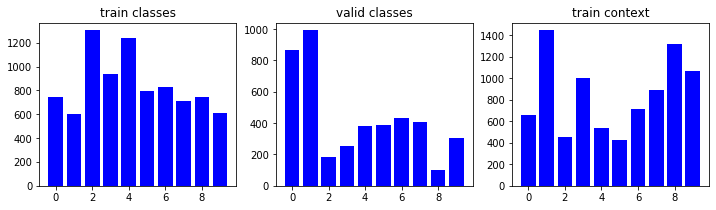

In [18]:
fig = plt.figure(figsize=(12,3))
ax1 = plt.subplot(131)
ax1.bar(np.unique(y_cls_train), np.bincount(y_cls_train), color='b')
ax1.set_title('train classes')
ax1 = plt.subplot(132)
ax1.bar(np.unique(y_cls_train), np.bincount(y_cls_valid), color='b')
ax1.set_title('valid classes')
ax1 = plt.subplot(133)
ax1.bar(np.unique(y_cxt_train), np.bincount(y_cxt_train), color='b')
ax1.set_title('train context')
plt.show()

# Pickle

In [19]:
pkl.dump((X_path_train, X_path_valid, 
         y_cls_train, y_cls_valid,
         y_cxt_train, y_cxt_valid), open('../checkpoints/nico/dataset_animal.pkl', 'wb'))

In [20]:
import tqdm

In [25]:
for i in range(2):
    for _ in tqdm.tqdm(range(10), leave=False):
        continue